# The Monte Carlo Simulation of Radiation Transport

WE will discuss essentiall physics and method to do gamma quanta (photons with high enough energy) radiation transport using Monte Carlo methods. We will covers interactions processes, basics of radiation passing through matter as well as Monte Carlo method and how it helps with radiation propagation. 

## Glossary
- $h$ Plank's constant
- $\hbar$ reduced Plank's constant, $h/2\pi$
- $\omega$ photon circular frequency, 
- $E_\gamma$ photon energy, equal to $\hbar \omega$
- $\lambda$ photon wavelength
- $\theta$ scattering angle, between incoming and outgoing photon
- $c$ speed of light in vacuum
- $m_e$ electron mass
- $r_e$ classical electron radius


## Basic physics

We would cover typical energies and wave length when photons are behaving like a point-like particle interaction with matter.

### Units

Common unit for a photon energy would be electron-volt (eV). This is the kinetic energy electron aquire when it moves in electric field (say, between plates of the capacitor) with potential difference 1Volt. This is very small energy and is equal to about $1.6\times10^{-19}$Joules. Typical energies we are interested inare in the 1keV to 100MeV range.

### Spatial size and wave length

Photons are massless particles, and it is very easy to compute photon "size" which is photon wavelength.
$$ \lambda = \frac{hc}{E_\gamma} $$
where $\lambda$ is wavelength, $h$ is Plank's constant, $c$ is speed of light and $E\gamma$ is photon energy. For example, lets compute wavelength for photon with energy 1eV.

In [1]:
h = 6.625e-34
c = 3e8
Eg = 1.0 * 1.6e-19
λ = h*c/Eg
print(f"Photon wavelength = {λ*1.0e9} nanometers")

Photon wavelength = 1242.1875 nanometers


Thus, for 1keV photon we will get wave length about 1.2 nm, and for 1MeV photon we will get wave length about $1.2\times10^{-3}$nm.

FOr comparison, typical atom size is from 0.1nm (He) to 0.4nm (Fr and other heavy). Therefore, for most interactions between photon and atoms in our enery range we could consider it particles, not waves.

## Basics of Monte Carlo methods

Was first introduced by Conte du Buffon, as needle dropping experiment to calculate value of $\pi$. Laplace extended the example of the CduB by using sampling in the square to calculate value of $\pi$. It is a very general method of stochastic integration of the function. Was successfully applied to the particles (neutron in this case) transport by Enrico Fermi. Since growing applications of computers it is growing exponentially in use - finances, radiation therapy, machine learning, astrophysics, optimizations, younameit.

Let's try to calculate $\pi$ with the Laplace method, namely sampe points uniformly in the 

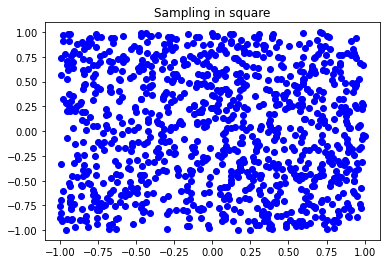

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = 1000 # number of points to sample

x = 2.0*np.random.random(N) - 1.0
y = 2.0*np.random.random(N) - 1.0

fig, ax = plt.subplots(1, 1)

ax.plot(x, y, 'bo', label='Sampling in square')
plt.title("Sampling in square")
plt.show()


In [9]:
r = np.sqrt(x*x + y*y)
print(r)
pinside = r[r<=1.0]
Ninside = len(pinside)
print(4.0*Ninside/N)

[0.91559775 0.6226083  0.57271185 1.00787447 0.15657289 0.87434716
 0.26413416 0.41943174 0.98262743 0.68048129 0.92643117 0.4597597
 0.76690917 0.59596903 1.18418954 0.91860666 0.38428637 0.39900078
 0.85299528 0.58174632 1.0005103  0.75398314 0.56483523 0.77339701
 0.41285419 1.0836581  0.06888039 0.93637737 0.95438675 0.43501023
 0.77488448 0.81856795 1.169078   0.60043246 0.55685057 0.88523037
 1.00208908 0.80488587 0.86678278 0.7073556  0.98009252 0.74955968
 0.80739828 1.07962451 0.65991068 0.50182281 0.99246035 1.02711702
 0.71023892 1.14584595 0.91105269 0.46571993 0.33944346 0.83991857
 0.69642434 0.75969376 1.06622866 0.88223583 0.72838875 1.12266671
 0.38676382 1.18943067 0.9709666  0.94380145 0.40990083 1.33650438
 1.02136695 0.43623037 0.93604888 0.45904505 1.37700279 0.99079348
 0.79706446 0.88704775 0.37470639 0.83815765 0.86455325 0.7545219
 0.714434   0.38740954 0.33310831 1.11345052 1.18903609 0.22996308
 0.7707204  0.71567872 0.88488175 0.66323967 0.73332932 0.311389

## Basic Photons Interactions with atoms

There are several interaction processess of photons with media.

### Compton Scattering

Compton scattering is described by Klein-Nishina formula
$$
\omega'=\frac{\omega}{1+\frac{E_\gamma}{m_e c^2} (1 - \cos{\theta})}
$$
where prime marks particle after scattering.

Scattering cross-section (you could think of this as denormalized probability to be scattered to a given angle)
$$
\frac{d\sigma}{d\Omega} = \frac{1}{2}r_e^2 \left (\frac{\lambda}{\lambda'} \right )^2 \lbrace \frac{\lambda}{\lambda'} + \frac{\lambda'}{\lambda} - \sin^2{\theta} \rbrace
$$